In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the Data 
movies =pd.read_csv('movies.dat',sep='::',header=None,names=['MovieID','Title','Generes'],engine='python')
ratings=pd.read_csv('ratings.dat',sep='::',header=None,names=['userID','MovieID','Ratings','Timestamp'])
users =pd.read_csv('users.dat',sep='::',header=None,names=['userID','Gender','Age','Occupation','Zip-code'])

E:\New folder (2)\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\New folder (2)\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [3]:
#merging the dataset
mergeDF=pd.merge(movies,ratings, on='MovieID')
FinalDF=pd.merge(mergeDF,users, on='userID')
FinalDF.head()

,MovieID,Title,Generes,userID,Ratings,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


(array([ 222.,    0.,    0., 1103., 2096.,    0., 1193.,    0., 1046.,
         380.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

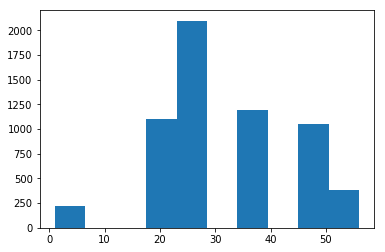

In [4]:
#1.Visualisation on user age 
plt.hist(users["Age"])

E:\New folder (2)\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


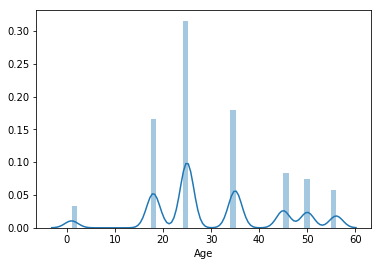

In [5]:
#visualisation using seaborn
sns.distplot(users['Age'])

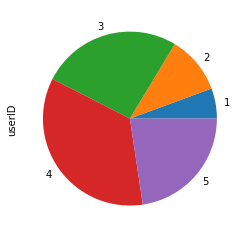

In [6]:
#2.Visualizing overall ratings by users
FinalDF.groupby('Ratings')['userID'].count().plot(kind='pie')

Ratings
1     16
2     61
3    345
4    835
5    820
Name: userID, dtype: int64


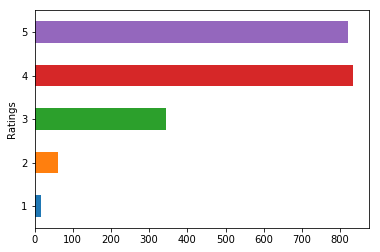

In [7]:
#3.finding Toystory
print(FinalDF[FinalDF.Title == "Toy Story (1995)"].groupby("Ratings")['userID'].count())
FinalDF[FinalDF.Title == 'Toy Story (1995)'].groupby('Ratings')['userID'].count().plot(kind='barh')

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: userID, dtype: int64


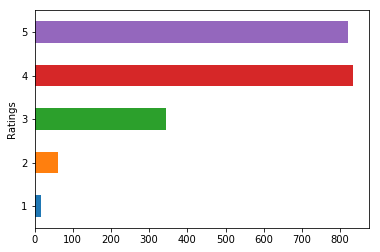

In [35]:
print(FinalDF[FinalDF.Title == "Toy Story (1995)"].groupby("Age")['userID'].count())
FinalDF[FinalDF.Title == "Toy Story (1995)"].groupby("Ratings")['userID'].count().plot(kind='barh')

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Ratings, dtype: int64


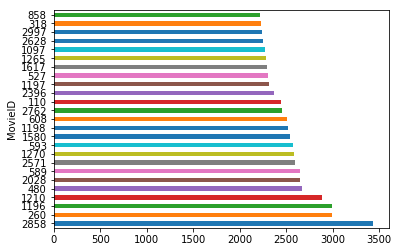

In [8]:
#Top 25 movies by viewership rating.
print(FinalDF.groupby('MovieID').Ratings.count().nlargest(25))
FinalDF.groupby('MovieID').Ratings.count().nlargest(25).plot(kind='barh')

In [9]:
#Find 2696 userid
FinalDF[FinalDF.userID == 2696].groupby("Ratings")["MovieID"].count()

Ratings
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64

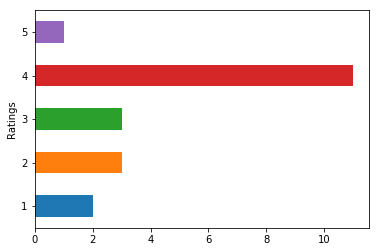

In [10]:
FinalDF[FinalDF.userID == 2696].groupby("Ratings")["MovieID"].count().plot(kind='barh')

In [11]:
#500 ML
mlData=FinalDF.head(500)
mlData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
MovieID       500 non-null int64
Title         500 non-null object
Generes       500 non-null object
userID        500 non-null int64
Ratings       500 non-null int64
Timestamp     500 non-null int64
Gender        500 non-null object
Age           500 non-null int64
Occupation    500 non-null int64
Zip-code      500 non-null object
dtypes: int64(6), object(4)
memory usage: 43.0+ KB


In [12]:
features=mlData.iloc[:,[0,7,8]].values
label = mlData.iloc[:,4].values

In [13]:
#Multiple classification
#K-NN
mlData.Ratings.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [23]:
#train test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.2,random_state=15)


In [24]:
#creating the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [25]:
# generalization
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.4275
0.43
